In [4]:
# Importing necessary libraries
import pandas as pd            # For data manipulation and analysis
import numpy as np             # For numerical computations
import matplotlib.pyplot as plt # For plotting visualizations
import seaborn as sns          # For advanced visualizations
from sklearn.preprocessing import StandardScaler # For feature scaling
from sklearn.decomposition import PCA           # For Principal Component Analysis
from sklearn.manifold import TSNE               # For t-SNE
from statsmodels.tsa.stattools import adfuller  # For stationarity testing
from sklearn.cluster import KMeans             # For clustering


In [5]:
# Reading the dataset into a pandas DataFrame
df = pd.read_csv('India Weather History.csv')  

In [3]:
# Checking the first few rows of the dataset to understand its structure
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
# Checking for missing values in the dataset
print(df.isnull().sum())

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64


In [5]:
# Getting basic statistical summary of the dataset
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [7]:
# Converting 'Formatted Date' to datetime format while ignoring time zones
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True).dt.tz_localize(None)
# Standardizing 'Formatted Date' to a common time zone (UTC)
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)

df.set_index('Formatted Date', inplace=True)

# Extracting useful date components for analysis
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day
df['Hour'] = df.index.hour

In [8]:
# Handling missing values in numerical columns using interpolation
df.fillna(df.interpolate(method='linear', axis=0), inplace=True)

In [9]:
# Handling missing values in categorical columns using the mode (most frequent value)
df['Precip Type'] = df['Precip Type'].fillna(df['Precip Type'].mode()[0])

In [10]:
# Dropping unnecessary columns (e.g., 'Loud Cover', if it's redundant)
if 'Loud Cover' in df.columns:
    df.drop('Loud Cover', axis=1, inplace=True)


In [11]:
# Verifying that missing values are handled
print(df.isnull().sum())

Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
Daily Summary               0
Year                        0
Month                       0
Day                         0
Hour                        0
dtype: int64


In [12]:
df.dtypes

Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Pressure (millibars)        float64
Daily Summary                object
Year                          int64
Month                         int64
Day                           int64
Hour                          int64
dtype: object

In [13]:
# Exploring categorical column distributions
df['Precip Type'].value_counts()
df['Summary'].value_counts()


Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

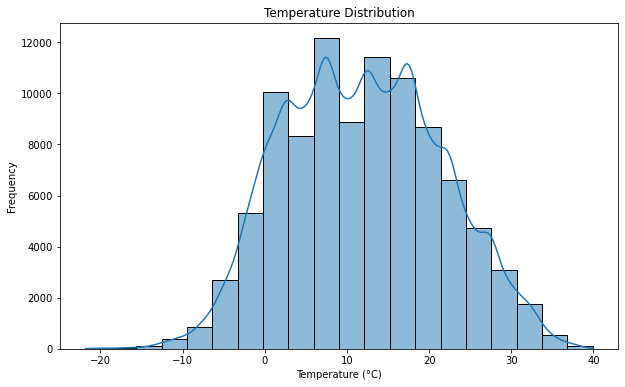

In [14]:
# Plotting a histogram for the 'Temperature' feature
plt.figure(figsize=(10, 6))
sns.histplot(df['Temperature (C)'], bins=20, kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

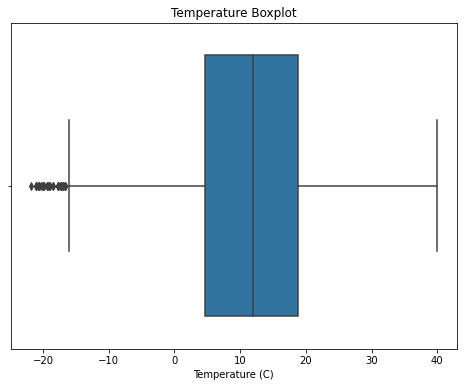

In [15]:
# Boxplot for 'Temperature' to identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Temperature (C)'])
plt.title('Temperature Boxplot')
plt.show()

In [16]:
print(df.dtypes)


Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Pressure (millibars)        float64
Daily Summary                object
Year                          int64
Month                         int64
Day                           int64
Hour                          int64
dtype: object


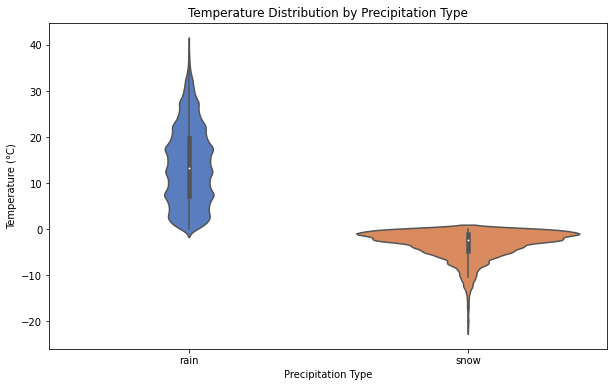

In [17]:
# Violin plot to visualize temperature distribution for different types of precipitation (Rain/Snow)
plt.figure(figsize=(10, 6))
sns.violinplot(x='Precip Type', y='Temperature (C)', data=df, palette='muted')
plt.title('Temperature Distribution by Precipitation Type')
plt.xlabel('Precipitation Type')
plt.ylabel('Temperature (°C)')
plt.show()


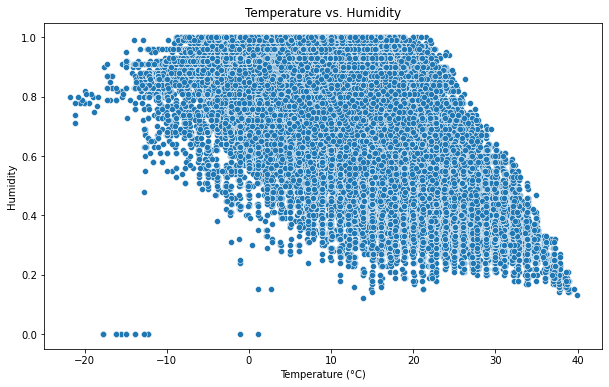

In [18]:
# Scatter plot to check the relationship between Temperature and Humidity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature (C)', y='Humidity', data=df)
plt.title('Temperature vs. Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity')
plt.show()

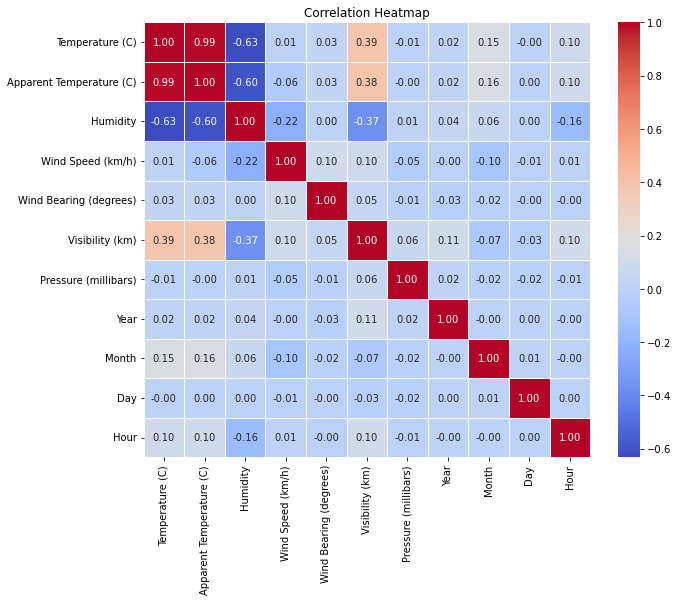

In [19]:
# Correlation heatmap to visualize relationships between multiple features
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()  # Calculate correlations
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [20]:
if 'Precip Type' not in df.columns:
    print("Column 'Precip Type' is missing from the dataset.")


In [21]:
# Checking data types of the columns
print(df[['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)']].dtypes)

# Identifying non-numeric or invalid entries
for column in ['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)']:
    invalid_entries = df[~df[column].apply(lambda x: isinstance(x, (int, float)))]
    print(f"Non-numeric values in {column}:\n{invalid_entries}")
    
# Converting columns to numeric and coercing errors to NaN
df[['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)']] = df[
    ['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)']
].apply(pd.to_numeric, errors='coerce')

# Dropping rows with NaN values after coercion
df.dropna(subset=['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)'], inplace=True)



Temperature (C)         float64
Humidity                float64
Wind Speed (km/h)       float64
Pressure (millibars)    float64
dtype: object
Non-numeric values in Temperature (C):
Empty DataFrame
Columns: [Summary, Precip Type, Temperature (C), Apparent Temperature (C), Humidity, Wind Speed (km/h), Wind Bearing (degrees), Visibility (km), Pressure (millibars), Daily Summary, Year, Month, Day, Hour]
Index: []
Non-numeric values in Humidity:
Empty DataFrame
Columns: [Summary, Precip Type, Temperature (C), Apparent Temperature (C), Humidity, Wind Speed (km/h), Wind Bearing (degrees), Visibility (km), Pressure (millibars), Daily Summary, Year, Month, Day, Hour]
Index: []
Non-numeric values in Wind Speed (km/h):
Empty DataFrame
Columns: [Summary, Precip Type, Temperature (C), Apparent Temperature (C), Humidity, Wind Speed (km/h), Wind Bearing (degrees), Visibility (km), Pressure (millibars), Daily Summary, Year, Month, Day, Hour]
Index: []
Non-numeric values in Pressure (millibars):
Empty 

Duplicate indexes found. Resetting the index.


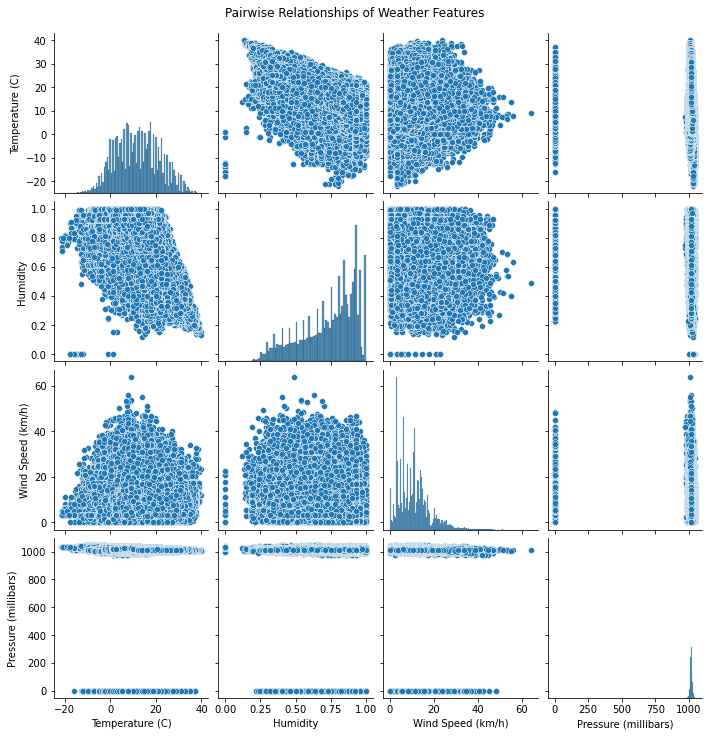

In [22]:
# Check for duplicate indexes
if not df.index.is_unique:
    print("Duplicate indexes found. Resetting the index.")
    df.reset_index(drop=True, inplace=True)
    
# Running pairplot after ensuring the data is clean
sns.pairplot(df[['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)']], palette='Set2')
plt.suptitle('Pairwise Relationships of Weather Features', y=1.02)
plt.show()


In [23]:
# Creating lag features for 'Temperature' and 'Humidity'
df['Temp_lag_1'] = df['Temperature (C)'].shift(1)  # Temperature from the previous day
df['Humidity_lag_1'] = df['Humidity'].shift(1)  # Humidity from the previous day

# Checking the new lag variables
print(df[['Temperature (C)', 'Temp_lag_1', 'Humidity', 'Humidity_lag_1']].head())

# Dropping rows with NaN values after creating lag variables (first row will have NaNs)
df.dropna(inplace=True)


   Temperature (C)  Temp_lag_1  Humidity  Humidity_lag_1
0         9.472222         NaN      0.89             NaN
1         9.355556    9.472222      0.86            0.89
2         9.377778    9.355556      0.89            0.86
3         8.288889    9.377778      0.83            0.89
4         8.755556    8.288889      0.83            0.83


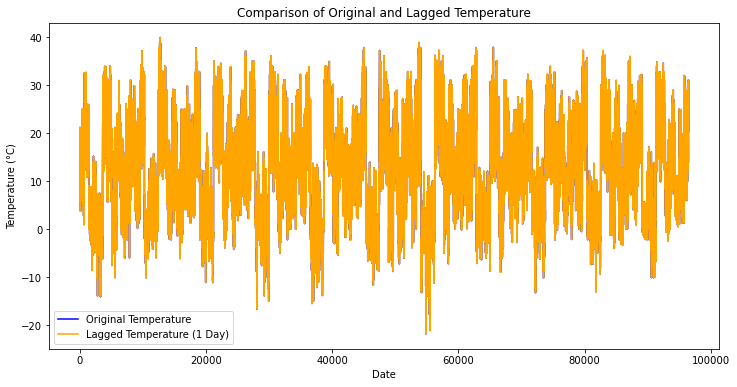

In [34]:
# Line plot to compare original and lagged temperature features
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Temperature (C)'], label='Original Temperature', color='blue')
plt.plot(df.index, df['Temp_lag_1'], label='Lagged Temperature (1 Day)', color='orange')
plt.title('Comparison of Original and Lagged Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()



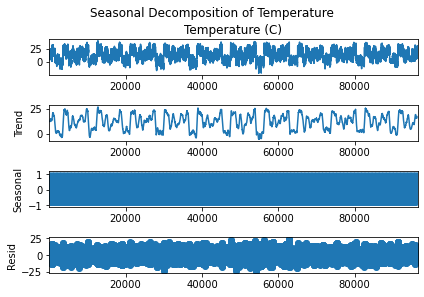

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose



# Decomposing the 'Temperature' time series into trend, seasonal, and residual components
result = seasonal_decompose(df['Temperature (C)'], model='additive', period=365)
result.plot()
plt.suptitle('Seasonal Decomposition of Temperature', y=1.02)
plt.show()


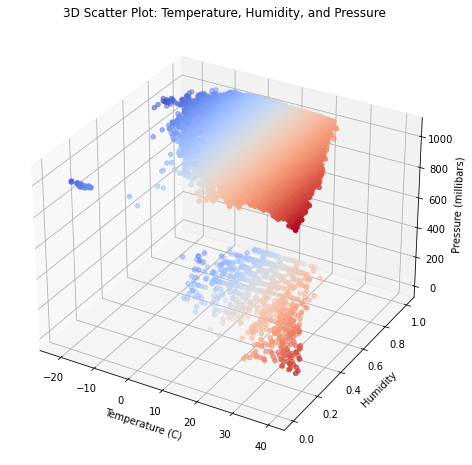

In [25]:
from mpl_toolkits.mplot3d import Axes3D


# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting Temperature, Humidity, and Pressure
ax.scatter(df['Temperature (C)'], df['Humidity'], df['Pressure (millibars)'],
           c=df['Temperature (C)'], cmap='coolwarm')

# Set labels for axes
ax.set_xlabel('Temperature (C)')
ax.set_ylabel('Humidity')
ax.set_zlabel('Pressure (millibars)')
ax.set_title("3D Scatter Plot: Temperature, Humidity, and Pressure")

# Show the plot
plt.show()


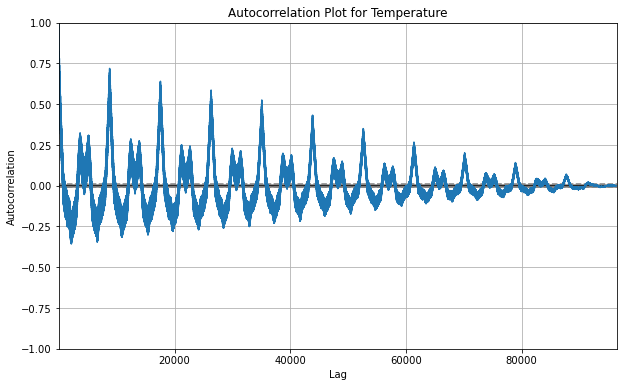

In [27]:
# Importing the necessary function
from pandas.plotting import autocorrelation_plot

# Plotting the autocorrelation for Temperature
plt.figure(figsize=(10, 6))
autocorrelation_plot(df['Temperature (C)'])
plt.title('Autocorrelation Plot for Temperature')
plt.show()



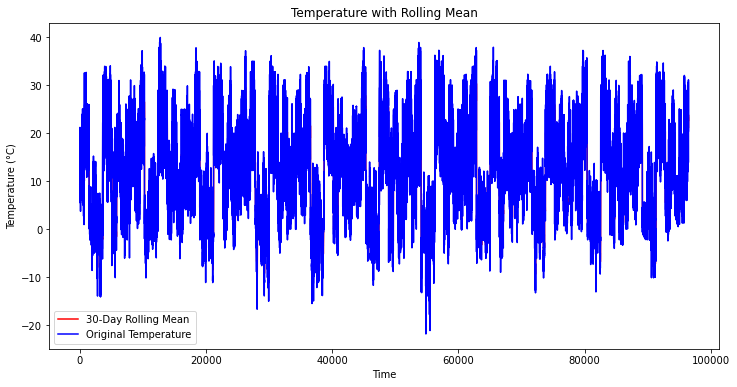

In [28]:
# Rolling mean plot for temperature
df['Temp_Rolling_Mean'] = df['Temperature (C)'].rolling(window=30).mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y='Temp_Rolling_Mean', data=df, color='red', label='30-Day Rolling Mean')
sns.lineplot(x=df.index, y='Temperature (C)', data=df, color='blue', label='Original Temperature')
plt.title('Temperature with Rolling Mean')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


In [35]:
# Strip spaces from column names if needed
df.columns = df.columns.str.strip()

# Ensure you're using the correct column names
scaled_data = scaler.fit_transform(df[['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)']])

# Converting scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)'])

# Displaying the scaled DataFrame
print(scaled_df.head())


   Temperature (C)  Humidity  Wind Speed (km/h)  Pressure (millibars)
0        -0.269815  0.640003           0.499597              0.105960
1        -0.267488  0.793477          -0.995464              0.108611
2        -0.381490  0.486528           0.476309              0.112629
3        -0.332632  0.486528           0.033846              0.113484
4        -0.283774  0.588844           0.455350              0.114766


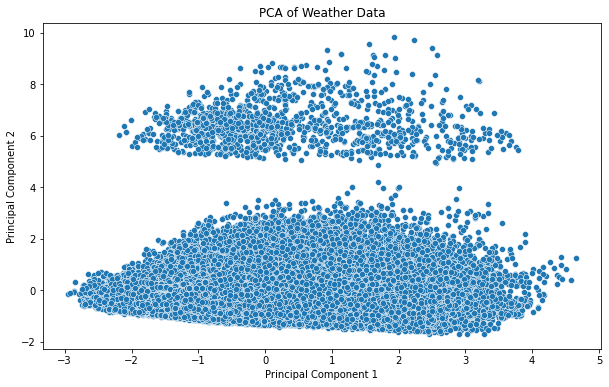

Explained variance ratio: [0.41862998 0.26039091]


In [36]:
# Scaling the data before applying PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)']])

# Applying PCA to reduce dimensions
pca = PCA(n_components=2)  # Reducing to 2 components for visualization
pca_components = pca.fit_transform(scaled_data)

# Creating a DataFrame for PCA results
pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])

# Visualizing the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', data=pca_df)
plt.title('PCA of Weather Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Explained variance by each PCA component
print(f'Explained variance ratio: {pca.explained_variance_ratio_}')


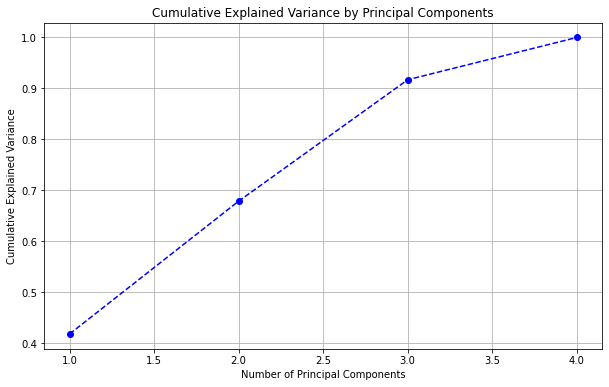

In [37]:
# Apply PCA
pca = PCA()
pca.fit(scaled_data)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative variance
cumulative_variance = explained_variance_ratio.cumsum()

# Plot cumulative variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
# Applying t-SNE for dimensionality reduction and visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(scaled_data)

# Creating a DataFrame for t-SNE results
tsne_df = pd.DataFrame(data=tsne_components, columns=['tSNE1', 'tSNE2'])

# Visualizing the t-SNE results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tSNE1', y='tSNE2', data=tsne_df)
plt.title('t-SNE Visualization of Weather Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


In [39]:
# Applying the Augmented Dickey-Fuller (ADF) test to check for stationarity in the 'Temperature' time series
result = adfuller(df['Temperature (C)'].dropna())  # Drop NaN values for testing
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# Interpreting the p-value for stationarity
if result[1] < 0.05:
    print("The time series is likely stationary.")
else:
    print("The time series is likely non-stationary.")


ADF Statistic: -10.13998161165325
p-value: 8.47066627659348e-18
The time series is likely stationary.


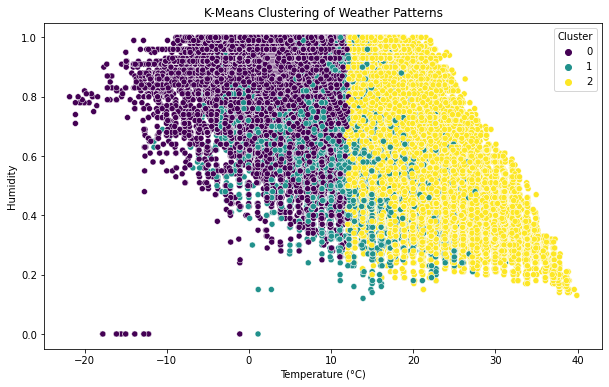

In [6]:
from sklearn.cluster import KMeans  # Import KMeans for clustering

# Applying K-Means clustering to group weather patterns
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Temperature (C)', 'Humidity', 'Wind Speed (km/h)']])

# Visualizing the clusters using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature (C)', y='Humidity', hue='Cluster', data=df, palette='viridis')
plt.title('K-Means Clustering of Weather Patterns')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity')
plt.show()

